In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import scipy
import numpy as np
import emcee
import testkit
import triangle
import cPickle as pickle
from IPython.display import display
%matplotlib inline

/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:14: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:74: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:110: UserWarning: Extinction files not found in grid/extinction
  warnings.warn('Extinction files not found in %s' % (extdir,))
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/locations.py:88: UserWarning: PYSYN_CDBS is undefined; cannot find mtab/*_tmg.fits file
  warnings.warn("PYSYN_CDBS is undefined; cannot find %s file" % template)
/Users/bb/Library/Python/2.7/lib/python/site-packages/pysynphot/location

In [2]:
with open('retrieval_result.pk1', 'rb') as input:
    sampler = pickle.load(input) 
print sampler.chain.shape

(8, 20000, 2)


[    0     1     2 ..., 19997 19998 19999]
(8, 20000, 2)


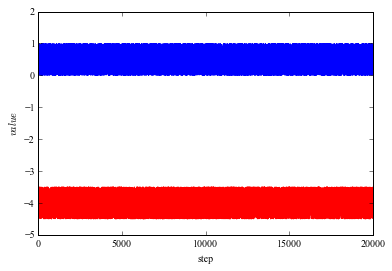

In [6]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0, 20000, -5.,2.])
index = np.arange(20000)
print index
print sampler.chain.shape
for i in range (0,7):
    plt.plot(index[:],sampler.chain[i,:,0],'r-')
for i in range (0,7):
    plt.plot(index[:],sampler.chain[i,:,1],'b-')
plt.ylabel(r'$value$')
plt.xlabel('step')


In [11]:
samples = sampler.chain[:,10000:, :].reshape((-1, 2))

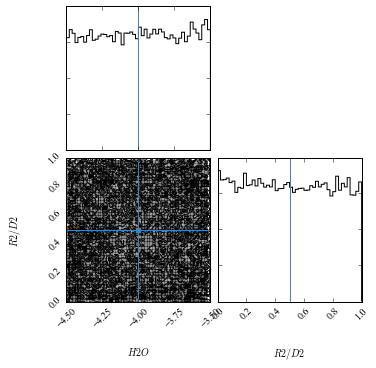

In [12]:
fig = triangle.corner(samples, labels=["$H2O$", "$R2/D2$"],
                      truths=[-4.0, 0.5])